# Notebook for Part 2 - Decision Trees

In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# decision tree
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Loading the train and test data sets

In [2]:
data_path = 'heart_disease_data'

df_train = pd.read_csv(data_path+'/train_dataset.csv')
df_test = pd.read_csv(data_path+'/test-dataset-oh.csv')

## 2.a) Question: Base line approach of allways predicting the mode.

In [3]:
# mode = target feature?? glaube das wurde in der vl mal gesagt aber ich finde es nicht

display(df_train)


,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,num
0,61,150.00,243.0,137.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,49,140.00,187.0,172.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,61,140.18,0.0,86.0,1.5,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
3,60,117.00,230.0,160.0,1.4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
4,59,128.82,0.0,128.0,2.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,67,106.00,223.0,142.0,0.3,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
686,53,130.00,0.0,135.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2
687,62,128.00,208.0,140.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
688,57,160.00,0.0,98.0,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2


## 2.b) Creating a decision tree

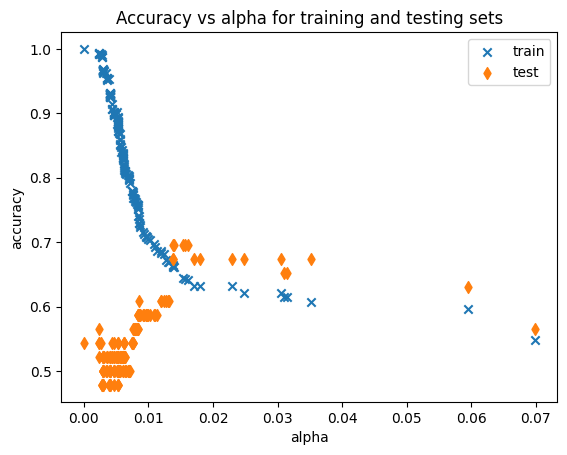

0.013876386334199423


In [4]:

from sklearn.metrics import accuracy_score, classification_report
columns = df_train.columns
descriptive_feature = columns[:-1]
target_feature = df_train[columns[-1]].values
df_descriptive = df_train[descriptive_feature].values

# test df
df_test_target = df_test[columns[-1]].values
df_test_des = df_test[descriptive_feature].values

classifier = tree.DecisionTreeClassifier(criterion='entropy')
path = classifier.cost_complexity_pruning_path(df_descriptive, target_feature)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
test = []
for ccp_alpha in ccp_alphas:
    sec_classifier = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=ccp_alpha)
    fit = sec_classifier.fit(df_descriptive,target_feature)
    test.append(fit)
    predict = sec_classifier.predict(df_test_des)

    
''' post pruning with cost complexity pruning '''
test = test[:-1]
ccp_alphas = ccp_alphas[:-1]
train_scores = [clf.score(df_descriptive, target_feature) for clf in test]
test_scores = [clf.score(df_test_des,df_test_target) for clf in test]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.scatter(ccp_alphas, train_scores, marker="x", label="train")
ax.scatter(ccp_alphas, test_scores, marker="d", label="test")
ax.legend()
plt.show()
print(ccp_alphas[test_scores.index(max(test_scores))])
final_ccp = ccp_alphas[test_scores.index(max(test_scores))]
final_classifier = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=final_ccp)
fit = final_classifier.fit(df_descriptive,target_feature)
predict_final = final_classifier.predict(df_test_des)


## 2.c) Question: Draw a decision tree

In [5]:

from subprocess import check_output
dot_file = "Classification.dot"
pdf_file = "Classification.pdf"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(final_classifier, out_file=f, 
                                 feature_names= descriptive_feature, 
                                 class_names=["no heart disease","small","Medium","more", "critical heart disease"], 
                                 filled=True, rounded=True)

check_output("dot -Tpdf "+ dot_file + " -o " + pdf_file , shell=True)

print( accuracy_score(df_test_target, predict_final))
print(classification_report(df_test_target,predict_final))

0.6956521739130435
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.64      0.82      0.72        17
           2       0.33      0.20      0.25         5
           3       1.00      0.25      0.40         4
           4       0.00      0.00      0.00         4

    accuracy                           0.70        46
   macro avg       0.55      0.45      0.45        46
weighted avg       0.64      0.70      0.64        46



c:\Users\finnv\envs\uni\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\finnv\envs\uni\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\finnv\envs\uni\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
